100 discharge cycles
100 charge cycles
20.975 seconds


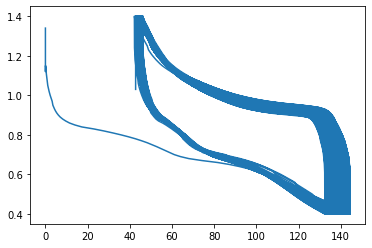

In [6]:
#Code_Dummy: Gurpreet Singh
#Test_Dummy: Mallory Vila

#MAC_AT_rev_2.0
#May_2020_Quarantine_Edition

#Pandas and NumPy dependency required; Anaconda highly recommended.
#If plot window not required, delete lines 25, 84, and 85. 

#Approximate speed is 1-2s per 1,000 data points

#Save Maccor File as CSV, and FORMAT mAmp-hr COLUMN in SCI.-NOT. WITH AT LEAST
    ## 4 DECIMAL PLACES BEFORE SAVING AS CSV. Delete all columns after time 
    ## column.


import pandas as pd
import time
import matplotlib.pyplot as plt

#Notes execution start time
t_start = time.time()

#Enter active mass in g
active_mass = [0.0044]

#Data imported as Pandas dataframe. Enter CSV file name.
df = pd.read_csv('gs_236_010h.078.csv',skiprows=1)

#uncorrected capacity column
for index,row in df.iterrows():
    df.loc[index,'spec_cap_unc'] = (df.loc[index,'mAmp-hr'])/active_mass

#holds charge/discharge cycle number, and index of last charge/discharge cycle that finished.    
chr_cycle_no = 0
dis_cycle_no = 0
prior_idx = 0

#corrected capacity columnn
#for loop iterating over all rows
for index,row in df.iterrows():
    #Rest state capacity; only applies if no charge/discharge cycle completed yet.
    if df.loc[index, 'State'] == 'R' and dis_cycle_no == 0 and chr_cycle_no == 0:
        df.loc[index,'spec_cap_cor'] = (df.loc[index,'mAmp-hr'])/active_mass
    #Rest state capacity when either a charge or discharge cycle has been completed.
    elif df.loc[index, 'State'] == 'R' and (dis_cycle_no != 0 or chr_cycle_no != 0):
        df.loc[index,'spec_cap_cor'] = df.loc[prior_idx,'spec_cap_cor']
        prior_idx = index
    #Discharge capacity at final step.
    elif df.loc[index,'State'] == 'D' and (df.loc[index,'ES'] == 133 or df.loc[index,'ES'] == 129):
        df.loc[index,'spec_cap_cor'] = df.loc[prior_idx,'spec_cap_cor']+((df.loc[index,'mAmp-hr'])/active_mass)
        dis_cycle_no = dis_cycle_no + 1
        prior_idx = index
    #Discharge capacity when either a charge or discharge cycle has been completed.
    elif df.loc[index,'State'] == 'D' and (dis_cycle_no != 0 or chr_cycle_no != 0):
        df.loc[index,'spec_cap_cor'] = df.loc[prior_idx,'spec_cap_cor']+((df.loc[index,'mAmp-hr'])/active_mass)
    #Discharge capacity; only used for non-final step of cycle when no charge or discharge has been completed.
    elif df.loc[index,'State'] == 'D':
        df.loc[index,'spec_cap_cor'] = (df.loc[index,'mAmp-hr'])/active_mass
    #Charge capacity at final step.
    elif df.loc[index,'State'] == 'C' and (df.loc[index,'ES'] == 133 or df.loc[index,'ES'] == 129):
        df.loc[index,'spec_cap_cor'] = df.loc[prior_idx,'spec_cap_cor']-(df.loc[index,'mAmp-hr'])/active_mass
        chr_cycle_no = chr_cycle_no + 1
        prior_idx = index
    #Charge capacity when either a charge or discharge cycle has been completed.
    elif df.loc[index,'State'] == 'C' and (dis_cycle_no != 0 or chr_cycle_no != 0):
        df.loc[index,'spec_cap_cor'] = df.loc[prior_idx,'spec_cap_cor']-((df.loc[index,'mAmp-hr'])/active_mass)
    #Charge capacity; only used for non-final step of cycle when no charge or discharge has been completed.
    elif df.loc[index,'State'] == 'C':
        df.loc[index,'spec_cap_cor'] = (df.loc[index,'mAmp-hr'])/active_mass
    #When no conditions above are satisfied. Likely to be last-step of data-file.
    else:
        df.loc[index,'spec_cap_cor'] = df.loc[index-1,'spec_cap_cor']

#Create CSV file with two appended columns: uncorrected and corrected capacity
df.to_csv("output_gs_236_010h.078.csv")

#Plot V vs. corrected capacity
plt.plot(df.spec_cap_cor,df.Volts)

#Calculate elapsed time.
t_tot = time.time()-t_start

#Print final statement, indicating code-execution complete. May add percent progress indicators later, idk.
print("%d discharge cycles\n%d charge cycles\n%.3f seconds" % (dis_cycle_no,chr_cycle_no,t_tot))

